# Least Squares Regression of the Logistic and Gompertz Models

---

The logistic and Gompertz can be linearized by taking the logarithm of the response variable. This is a common technique used in regression analysis to linearize non-linear models. To apply least squares regression to the logistic and Gompertz models, one can transform the models into a linear form by taking the logarithm of the response variable. This allows for the estimation of parameters using linear regression techniques. The resulting linearized equations facilitate the comparison of model fits and the assessment of goodness-of-fit metrics.

---

## Logistic Model Linearization

The continuous solution for the **logistic model** is given by:

$ P_{L}(t) = \frac{K}{1 + \left(\frac{K - P_0}{P_0}\right)e^{rt}} $

To linearize this, we can manipulate the equation as follows. First, we rearrange the equation to isolate the term involving $e^{rt}$:

$ P_{L}(t)(1 + \left(\frac{K - P_0}{P_0}\right)e^{rt}) = K $

This leads to:

$ \left(\frac{K - P_0}{P_0}\right)e^{rt} = \frac{K - P_{L}(t)}{P_{L}(t)} $

Taking the natural logarithm of both sides gives:

$ \ln\left(\frac{K - P_{L}(t)}{P_{L}(t)}\right) = \ln\left(\frac{K - P_0}{P_0}\right) + rt $

This linear form can be expressed as:

$ y = mx + b $

where $y = \ln\left(\frac{K - P_{L}(t)}{P_{L}(t)}\right)$, $m = r$, $x = t$, and $b = \ln\left(\frac{K - P_0}{P_0}\right)$.

---

## Gompertz Model Linearization

The continuous solution for the Gompertz model is given by:

$ P_{G}(t) = K\left(\frac{P_0}{K}\right)e^{-rt} $

To linearize this, we can follow a similar approach:

Rearranging the equation gives:

$ \frac{P_{G}(t)}{K} = \frac{P_0}{K} e^{-rt} $

Taking the natural logarithm of both sides results in:

$ \ln\left(\frac{P_{G}(t)}{K}\right) = \ln\left(\frac{P_0}{K}\right) - rt $

This can also be expressed in the linear form:

$ y = mx + b $

where $y = \ln\left(\frac{P_{G}(t)}{K}\right)$, $m = -r$, $x = t$, and $b = \ln\left(\frac{P_0}{K}\right)$.

We can now compute the linear regression of both models by the following:


Continuous Growth (Logistic) Regression results:
- Slope: 9.6571 +/- 0.0498
- Intercept: 6.8480 +/- 0.2879
- R: 0.9934


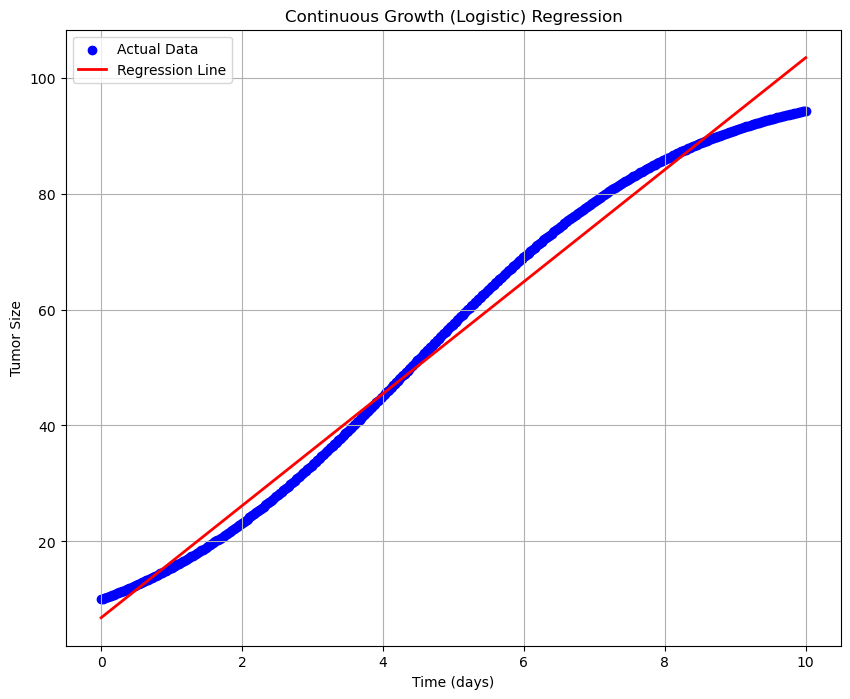


Discrete Growth (Logistic) Regression results:
- Slope: 9.6475 +/- 0.1099
- Intercept: 6.5677 +/- 0.6359
- R: 0.9936


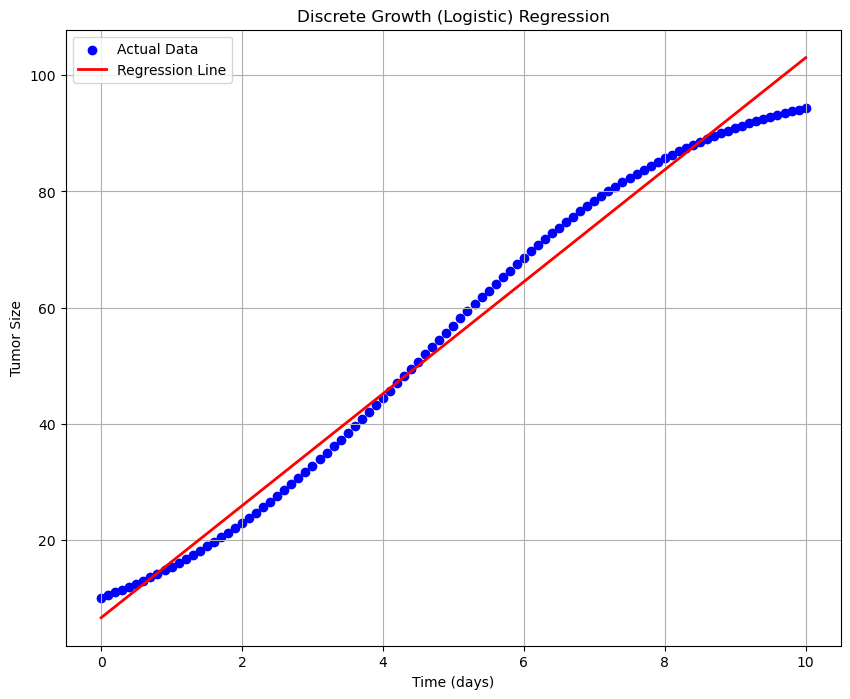

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

class TumorGrowthModel:

    def __init__(self, r=0.2, K=1000, P0=10, T=100, dt=0.1):
        self.r = r # Growth rate
        self.K = K # Carrying capacity
        self.P0 = P0 # Initial condition
        self.T = T # Time
        self.dt = dt # Change in time
        self.steps = int(T / dt) # Time step
        self.results_continuous = None
        self.results_discrete = None

    # Logistic model
    def logistic_model(self, t, P):
        return self.r * P * (1 - P / self.K)

    # Gompertz model
    def gompertz_model(self, t, P):
        return self.r * P * np.log(self.K / P)

    # Solve continuous ODE system
    def simulate_continuous(self):
        t_eval = np.linspace(0, self.T, 500)
        sol_logistic = solve_ivp(self.logistic_model, (0, self.T), [self.P0], t_eval=t_eval)
        sol_gompertz = solve_ivp(self.gompertz_model, (0, self.T), [self.P0], t_eval=t_eval)

        self.results_continuous = pd.DataFrame({
            'time': t_eval,
            'logistic': sol_logistic.y[0],
            'gompertz': sol_gompertz.y[0]
        })
        return self.results_continuous

    # Solve discrete recurrence relations
    def simulate_discrete(self):
        time = np.linspace(0, self.T, self.steps + 1)
        logistic_vals = np.zeros(self.steps + 1)
        gompertz_vals = np.zeros(self.steps + 1)
        logistic_vals[0] = self.P0
        gompertz_vals[0] = self.P0

        for n in range(self.steps):
            P_log = logistic_vals[n]
            P_gomp = gompertz_vals[n]
            logistic_vals[n + 1] = P_log + self.r * P_log * (1 - P_log / self.K) * self.dt
            gompertz_vals[n + 1] = P_gomp + self.r * P_gomp * np.log(self.K / P_gomp) * self.dt

        self.results_discrete = pd.DataFrame({
            'time': time,
            'logistic_discrete': logistic_vals,
            'gompertz_discrete': gompertz_vals
        })
        return self.results_discrete

    # Save both datasets if available
    def save_to_csv(self):
        if self.results_continuous is not None:
            self.results_continuous.to_csv('simulated_growth_continuous.csv', index=False)
        if self.results_discrete is not None:
            self.results_discrete.to_csv('simulated_growth_discrete.csv', index=False)

    # Plot both sets of results
    def plot_results(self):
        if self.results_discrete is not None:
            plt.figure(figsize=(10, 6))
            plt.plot(self.results_discrete['time'], self.results_discrete['logistic_discrete'],
                     label='Logistic (Discrete)', color='black')
            plt.plot(self.results_discrete['time'], self.results_discrete['gompertz_discrete'],
                     label='Gompertz (Discrete)', linestyle='--', color='green')
            plt.xlabel('Time')
            plt.ylabel('Tumor Size')
            plt.title('Discrete-Time Tumor Growth Simulation')
            plt.legend()
            plt.grid(True)
            plt.show()

        if self.results_continuous is not None:
            plt.figure(figsize=(10, 6))
            plt.plot(self.results_continuous['time'], self.results_continuous['logistic'],
                     label='Logistic Growth (Continuous)', linewidth=2, color='red')
            plt.plot(self.results_continuous['time'], self.results_continuous['gompertz'],
                     label='Gompertz Growth (Continuous)', linewidth=2, linestyle='--', color='blue')
            plt.xlabel('Time (days)')
            plt.ylabel('Tumor Size')
            plt.title('Tumor Growth Models: Logistic vs Gompertz')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

class LinearRegressionModel:
    
    @staticmethod
    def basic_linear_regression(x: np.ndarray, y: np.ndarray):
        """
        Constructs a basic linear regression model.
        """
        N = len(x)
        
        # Input validation
        if len(x) != len(y):
            raise ValueError(f"Error: x (size {len(x)}) and y (size {len(y)}) must be the same length.")
        if N <= 2:
            raise ValueError("Error: Need at least 3 points for linear regression.")
        
        # Key calculations
        x_sum, y_sum = np.sum(x), np.sum(y)
        x_avg, y_avg = x_sum / N, y_sum / N
        
        # Covariance and variance calculations
        xy_cov = np.sum((x - x_avg) * (y - y_avg))
        x_var = np.sum((x - x_avg) ** 2)
        
        slope = xy_cov / x_var
        intercept = y_avg - slope * x_avg
        
        # Error calculations
        predictions = intercept + slope * x
        residuals = y - predictions
        rss = np.sum(residuals ** 2)
        std_error = np.sqrt(rss / (N - 2)) if N > 2 else 0
        
        slope_error = std_error / np.sqrt(x_var)
        intercept_error = std_error * np.sqrt(1/N + (x_avg ** 2) / x_var)
        
        # Correlation coefficient
        y_var = np.sum((y - y_avg) ** 2)
        r = xy_cov / np.sqrt(x_var * y_var)
        
        return slope, intercept, r, predictions, slope_error, intercept_error
    
    @staticmethod
    def plot_regression(x: np.ndarray, y: np.ndarray, predictions: np.ndarray,
                        title: str = "Tumor Growth Regression"):
        """
        Visualizes regression results.
        """
        plt.figure(figsize=(10, 8))
        plt.scatter(x, y, label='Actual Data', color='blue')
        plt.plot(x, predictions, label='Regression Line', color='red', linewidth=2)
        plt.xlabel('Time (days)')
        plt.ylabel('Tumor Size')
        plt.title(title)
        plt.legend()
        plt.grid(True)
        plt.show()

def main():
    """
    Example linear regression model.
    """
    # Generate growth data
    model = TumorGrowthModel(r=0.5, K=100, P0=10, T=10, dt=0.1)
    cont_data = model.simulate_continuous()
    disc_data = model.simulate_discrete()
    
    # Run regression model for both discrete and continuous data
    for name, data, target in [
            ('Continuous Growth (Logistic)', cont_data, 'logistic'),
            ('Discrete Growth (Logistic)', disc_data, 'logistic_discrete')
            ]:
        x = data['time'].values
        y = data[target].values
        
        slope, intercept, r, preds, slope_err, int_err = LinearRegressionModel.basic_linear_regression(x, y)
        
        # Print results
        print(f'\n{name} Regression results:')
        print(f'- Slope: {slope:.4f} +/- {slope_err:.4f}')
        print(f'- Intercept: {intercept:.4f} +/- {int_err:.4f}')
        print(f'- R: {r:.4f}')
        
        # Plot results
        LinearRegressionModel.plot_regression(x, y, preds, f"{name} Regression")

# Usage
if __name__ == '__main__':
    main()



# Discussion

---

We realized that by taking the logarithm of the response variable in both the logistic and Gompertz models, we can linearize the equations, allowing for the application of least squares regression to estimate the parameters $r$ and $K$. The resulting linear forms facilitate the comparison of model fits and the evaluation of growth dynamics. This approach not only simplifies the estimation process but also enhances the interpretability of the model parameters. By transforming the non-linear relationships into linear ones, we can leverage the well-established techniques of linear regression, which are computationally efficient and widely understood.

## Advantages of Linearization

**Parameter Estimation**: Linearization allows for straightforward estimation of parameters using ordinary least squares (OLS) methods. This is particularly beneficial when dealing with large datasets, as OLS is computationally efficient and provides reliable estimates.

**Model Comparison**: The linearized forms of the logistic and Gompertz models enable direct comparison of their fits to the data. By analyzing the goodness-of-fit metrics such as R-squared and RMSE, we can determine which model better captures the underlying growth dynamics.

**Interpretability**: The linearized equations provide a clearer interpretation of the parameters. For instance, in the logistic model, the parameter $r$ represents the intrinsic growth rate, while $K$ indicates the carrying capacity. In the Gompertz model, the negative slope associated with $r$ reflects the rate of decline in growth as the population approaches its limit.

# Conclusion

---

In conclusion, the linearization of the logistic and Gompertz models through logarithmic transformation provides a powerful framework for parameter estimation and model comparison. By applying least squares regression to the linearized equations, we can gain valuable insights into growth dynamics and make informed decisions based on the fitted models. However, it is essential to remain vigilant about the assumptions and limitations inherent in this approach, ensuring that the chosen model accurately reflects the underlying biological or ecological processes being studied.